In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [53]:
from itertools import accumulate

def movement(prev_state, p):
    prev, radians, d = prev_state
    return (p,
            math.atan((prev[0]-p[0])/(prev[1]-p[1])) - radians,
            math.dist(prev, p))

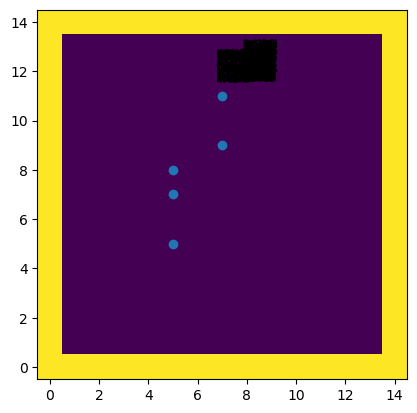

In [19]:
m = np.zeros((15,15))
m[ 0,:] = 1
m[-1,:] = 1
m[:, 0] = 1
m[:,-1] = 1

n = 5000
jitter = lambda magnitude: np.array([(1+x*13,1+y*13,t*2*math.pi)for x,y,t in np.random.rand(n,3)]) * magnitude
r_samples = jitter(1)
# x,y,theta

plt.imshow(m, origin="lower")
points = np.array([(5,5),(5,7),(5,8),(7,9),(7,11)])
moves = [(turn, dist) for _, turn, dist in accumulate(points[1:], movement, initial=(points[0],0,0))][1:]
plt.scatter(*points.T[:2])
plt.scatter(7,12)

def plt_samples(r_samples):
    plt.quiver(*r_samples.T[:2], np.cos(r_samples.T[2]), np.sin(r_samples.T[2]))

def move_sample(sample, turn, dist):
    x, y, t = sample
    return (x+np.cos(t-turn)*dist, y+np.sin(t-turn)*dist, t-turn)

def disqualify_sample(sample, m):
    x, y, t = sample
    return (1 > x) or (x > 14) or (1 > y) or (y > 14)

def sensor(sample, landmark):
    lx, ly, ld, lw = landmark
    sx, sy, _ = move_sample(sample, 0, ld)
    return lw > math.dist((lx,ly),(sx,sy))

for turn, dist in moves:
    r_samples = np.array([move_sample(s, turn, dist) for s in r_samples])
    r_samples = np.array([s for s in r_samples if not disqualify_sample(s, m)])
    r_samples = r_samples[np.random.choice(len(r_samples),n)]

r_samples = np.array([s for s in r_samples if sensor(s, (7,12, 1, 0.5))])
r_samples = r_samples[np.random.choice(len(r_samples),n)] + jitter(0.1)
plt_samples(r_samples)